In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
from scipy.signal import savgol_filter

In [25]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xinter = -popt.intercept/popt.slope
    xinter_err = xinter*np.sqrt((popt.intercept_stderr/popt.intercept)**2 + (popt.stderr/popt.slope)**2)
    xFit = np.arange(xinter, max(xs), 2e-4)
    label = f'For the best fit line (r-value = {popt.rvalue:.3f}):\nslope = ({popt.slope*1e-14:.2f} ± {popt.stderr*1e-14:.2f})' + r'$\times 10^{14}$' + f'\nintercept = ({popt.intercept*1e-14:.2f} ± {popt.intercept_stderr*1e-14:.2f})' + r'$\times 10^{14}$'
    return xFit, straight_line(xFit, popt.slope, popt.intercept), popt.rvalue, (xinter, xinter_err), label

# ZnTe

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


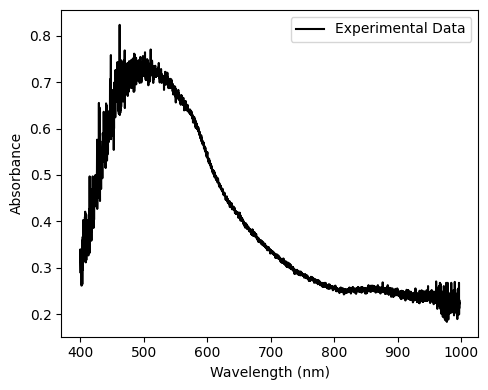

In [16]:
data = pd.read_excel('data/ZnTe.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(5,4))
x1 = np.array(data['Wavelength'])
y1 = np.array(data['Absorbance'])

plt.plot(x1, y1, 'k', label='Experimental Data')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.tight_layout()
plt.savefig('images/znteA.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Band gap: 1.859 + 0.013 eV (r-value: 0.997)


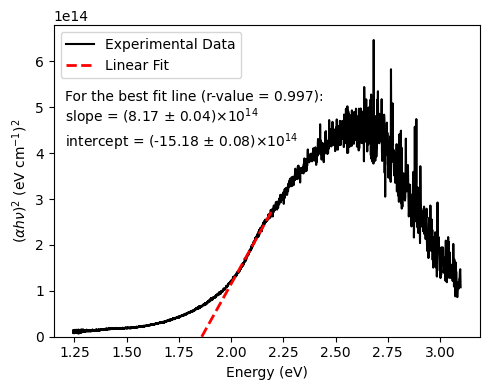

In [18]:
# data = pd.read_excel('ZnTe.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(5,4))
x1 = np.array(1240/data['Wavelength'])
y1 = np.array((2.303*data['Absorbance']*x1/0.2e-6)**2)

a, b = 2, 2.2
# plt.axvline(a); plt.axvline(b)
roi = np.where((x1 < b) & (x1 > a))
xx, yy, r, bg, label = fit_line(x1[roi], y1[roi])
print(f'Band gap: {bg[0]:.3f} + {bg[1]:.3f} eV (r-value: {r:.3f})')

plt.plot(x1, y1, 'k', label='Experimental Data')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.gca().set_ylim(bottom=0)
plt.legend()
plt.xlabel('Energy (eV)')
plt.ylabel(r'$(\alpha h \nu)^2$ (eV cm$^{-1}$)$^2$')
plt.tight_layout()
plt.text(0.14,0.62,label,transform=plt.gcf().transFigure)
plt.savefig('images/znte.eps')

# CdS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


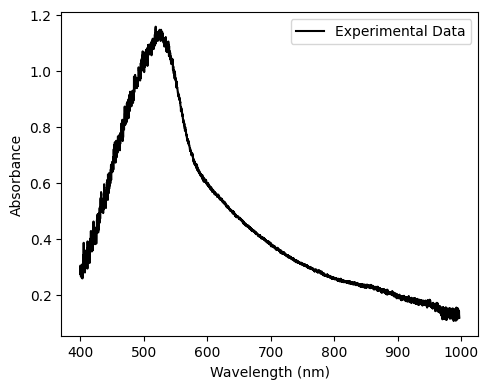

In [5]:
data = pd.read_excel('data/CdS.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(5,4))
x1 = np.array(data['Wavelength'])
y1 = np.array(data['Absorbance'])

plt.plot(x1, y1, 'k', label='Experimental Data')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.tight_layout()
plt.savefig('images/cdsA.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Band gap: 2.074 + 0.026 eV (r-value: 0.993)


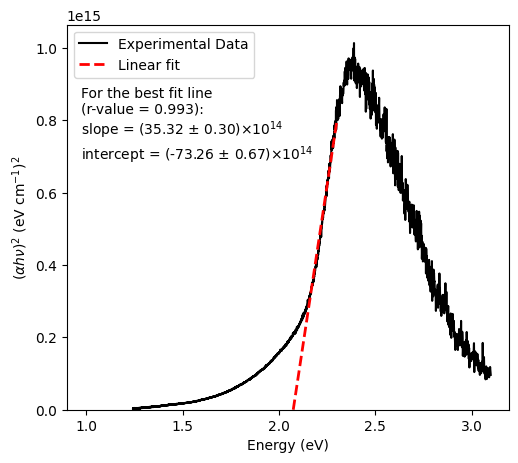

In [6]:
plt.figure(figsize=(5.7,5))
x1 = np.array(1240/data['Wavelength'])
y1 = np.array((2.303*data['Absorbance']*x1/0.2e-6)**2)

a, b = 2.14, 2.3
# plt.axvline(a); plt.axvline(b)
roi = np.where((x1 < b) & (x1 > a))
xx, yy, r, bg, label = fit_line(x1[roi], y1[roi])
print(f'Band gap: {bg[0]:.3f} + {bg[1]:.3f} eV (r-value: {r:.3f})')

plt.plot(x1, y1, 'k', label='Experimental Data')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear fit')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0.9)
plt.legend()
plt.text(0.15,0.61,label,transform=plt.gcf().transFigure)
plt.xlabel('Energy (eV)')
plt.ylabel(r'$(\alpha h \nu)^2$ (eV cm$^{-1}$)$^2$')
plt.savefig('images/cds.eps')

# ZnO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


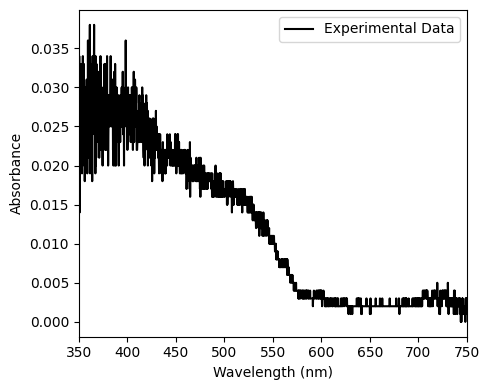

In [26]:
data = pd.read_excel('data/ZnO6.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(5,4))
x1 = np.array(data['Wavelength'])
y1 = np.array(data['Absorbance'])

plt.plot(x1, y1, 'k', label='Experimental Data')
plt.xlim(350, 750)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.tight_layout()
plt.savefig('images/znoA.eps')

C:\Users\user\AppData\Local\Temp\ipykernel_11816\3491206823.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1, y1, 'k-', color='#aaa', label='Observed data')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Band gap: 2.539 + 0.359 eV (r-value: 0.654)


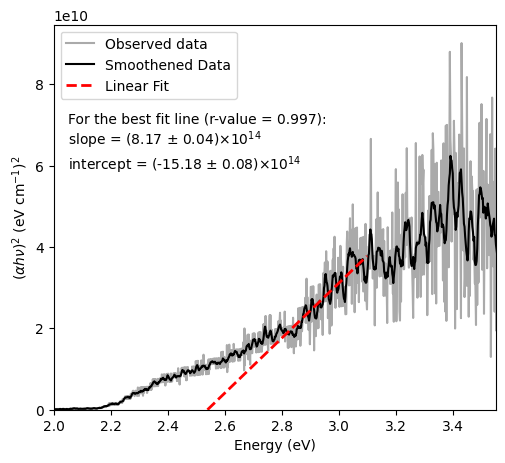

In [ ]:
data = pd.read_excel('data/ZnO6.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(5.7,5))
x1 = np.array(1240/data['Wavelength'])
y1 = np.array((2.303*data['Absorbance']*x1/1e-6)**2)

a, b = 2.85, 3.1
# plt.axvline(a); plt.axvline(1240/550)
roi = np.where((x1 < b) & (x1 > a))
xx, yy, r, bg, _ = fit_line(x1[roi], y1[roi])
print(f'Band gap: {bg[0]:.3f} + {bg[1]:.3f} eV (r-value: {r:.3f})')

y2 = savgol_filter(y1, 25, 4)
plt.plot(x1, y1, 'k-', color='#aaa', label='Observed data')
plt.plot(x1, y2, 'k', alpha=1, label='Smoothened Data')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')

plt.xlim(2, 3.55)
plt.gca().set_ylim(bottom=0)
plt.text(0.15,0.59,label,transform=plt.gcf().transFigure)
plt.xlabel('Energy (eV)')
plt.ylabel(r'$(\alpha h \nu)^2$ (eV cm$^{-1}$)$^2$')
plt.legend()
plt.savefig('images/zno.eps')

## ignore

Band gap: 2.189 + 0.099 eV (r-value: 0.893)


Text(0, 0.5, '$\\alpha^{n}$')

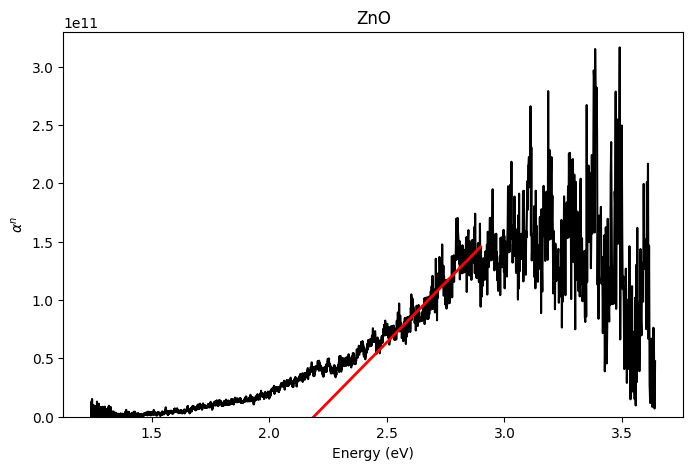

In [ ]:
data = pd.read_excel('data/zno5.5.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(8,5))
x1 = np.array(1240/data['Wavelength'])
y1 = np.array((2.303*data['Absorbance']*x1/1e-6)**2)

# a, b = 2.13, 2.3
a, b = 2.5, 2.9
# plt.axvline(a); plt.axvline(b)
roi = np.where((x1 < b) & (x1 > a))
xx, yy, r, bg, _ = fit_line(x1[roi], y1[roi])
print(f'Band gap: {bg[0]:.3f} + {bg[1]:.3f} eV (r-value: {r:.3f})')

plt.plot(x1, y1, 'k')
plt.plot(xx,yy, 'r', linewidth=2)

plt.ylim(0, 3.3e11)
# plt.ylim(-0.1e10, 0.8e10)

plt.title('ZnO')
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\alpha^{n}$')

Band gap: 1.975 + 0.095 eV (r-value: 0.876)


Text(0, 0.5, '$\\alpha^{n}$')

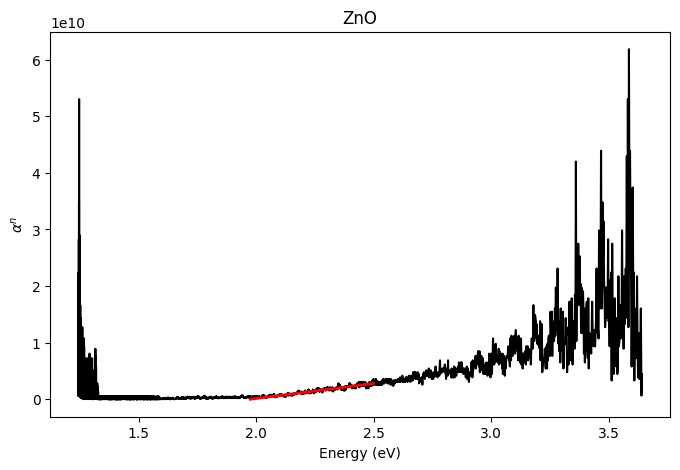

In [ ]:
data = pd.read_excel('data/zno7.xlsx', sheet_name='Sheet1')
plt.figure(figsize=(8,5))
x1 = np.array(1240/data['Wavelength'])
y1 = np.array((2.303*data['Absorbance']/1e-6)**2)

# a, b = 2.13, 2.3
a, b = 2.2, 2.5
# plt.axvline(a); plt.axvline(b)
roi = np.where((x1 < b) & (x1 > a))
xx, yy, r, bg, _ = fit_line(x1[roi], y1[roi])
print(f'Band gap: {bg[0]:.3f} + {bg[1]:.3f} eV (r-value: {r:.3f})')

plt.plot(x1, y1, 'k')
plt.plot(xx,yy, 'r', linewidth=2)

# plt.xlim(2.4, 3.1)
# plt.ylim(-0.1e10, 0.8e10)

plt.title('ZnO')
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\alpha^{n}$')